# Important stuff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Review criteria

**Clarity**

- The clear step-by-step instruction on how to produce the final submit file is provided

- Code has comments where it is needed and meaningful function names

**Feature preprocessing and generation with respect to models**

- Several simple features are generated

- For non-tree-based models preprocessing is used or the absence of it is explained

**Feature extraction from text and images**

- Features from text are extracted

- Special preprocessings for text are utilized (TF-IDF, stemming, levenshtening...)

**EDA**

- Several interesting observations about data are discovered and explained

- Target distribution is visualized, time trend is assessed

**Validation**

- Type of train/test split is identified and used for validation

- Type of public/private split is identified

**Data leakages**

- Data is investigated for data leakages and investigation process is described

- Found data leakages are utilized

**Metrics optimization**

- Correct metric is optimized

**Advanced Features I: mean encodings**

- Mean-encoding is applied

- Mean-encoding is set up correctly, i.e. KFold or expanding scheme are utilized correctly

**Advanced Features II**

- At least one feature from this topic is introduced

**Hyperparameter tuning**

- Parameters of models are roughly optimal

**Ensembles**

- Ensembling is utilized (linear combination counts)

- Validation with ensembling scheme is set up correctly, i.e. KFold or Holdout is utilized

- Models from different classes are utilized (at least two from the following: KNN, linear models, RF, GBDT, NN)

# Data Work

## Main Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dest = '/content/drive/MyDrive/HSE Final Project/Data/'

df_train = pd.read_csv(dest + 'sales_train.csv')
df_test = pd.read_csv(dest + 'test.csv')

In [ ]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## Additional Data

In [ ]:
df_shops = pd.read_csv(dest + 'shops.csv')
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
df_shops['city'] = [split[0] for split in df_shops['shop_name'].str.split()]
df_shops['shop_type'] = [split[1] for split in df_shops['shop_name'].str.split()]
df_shops.head()

,shop_name,shop_id,city,shop_type
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [ ]:
mask = (df_shops.shop_type != 'ТЦ') & \
        (df_shops.shop_type != 'ТРК') & \
        (df_shops.shop_type != 'ТРЦ') & \
        (df_shops.shop_type != 'МТРЦ') & \
        (df_shops.shop_type != 'ТК')

# mask = df_shops.shop_type not in ['ТЦ', 'ТРК', 'ТРЦ', 'МТРЦ', 'ТК']

df_shops.loc[mask, 'shop_type'] = 'ТЦ'
df_shops.head()

,shop_name,shop_id,city,shop_type
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,ТЦ
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [ ]:
import string

df_shops['city'] = df_shops.city.str.translate(str.maketrans('', '', string.punctuation))
df_shops.head()

,shop_name,shop_id,city,shop_type
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,ТЦ
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = encoder.fit_transform(df_shops.city.values.reshape(-1,1))

# add this back into the original dataframe 
encoded = pd.DataFrame(X, columns=["city_enc"]) 
df_shops = pd.concat([df_shops, encoded], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# drop the city column and city_0 to avoid so called "Dummy Variable Trap"
df_shops = df_shops.drop(['city'], axis=1) 
df_shops.head()

,shop_name,shop_id,shop_type,city_enc
0,"!Якутск Орджоникидзе, 56 фран",0,ТЦ,29
1,"!Якутск ТЦ ""Центральный"" фран",1,ТЦ,29
2,"Адыгея ТЦ ""Мега""",2,ТЦ,0
3,"Балашиха ТРК ""Октябрь-Киномир""",3,ТРК,1
4,"Волжский ТЦ ""Волга Молл""",4,ТЦ,2


The same for shop_type

In [ ]:
encoder = LabelEncoder()
X = encoder.fit_transform(df_shops.shop_type.values.reshape(-1,1))

encoded = pd.DataFrame(X, columns=["shop_type_enc"]) 
df_shops = pd.concat([df_shops, encoded], axis=1)

df_shops = df_shops.drop(['shop_type'], axis=1) 
df_shops.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,shop_name,shop_id,city_enc,shop_type_enc
0,"!Якутск Орджоникидзе, 56 фран",0,29,4
1,"!Якутск ТЦ ""Центральный"" фран",1,29,4
2,"Адыгея ТЦ ""Мега""",2,0,4
3,"Балашиха ТРК ""Октябрь-Киномир""",3,1,2
4,"Волжский ТЦ ""Волга Молл""",4,2,4


In [ ]:
df_shops.drop(['shop_name'], axis=1, inplace=True)
# df_shops.astype('int')
df_shops.head()

,shop_id,city_enc,shop_type_enc
0,0,29,4
1,1,29,4
2,2,0,4
3,3,1,2
4,4,2,4


In [ ]:
df_cat = pd.read_csv(dest + 'items.csv')
df_cat.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
df_categories = pd.read_csv(dest + 'item_categories.csv')
df_categories.head(100)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
df_categories['item_area'] = [split[0].split()[0] for split in df_categories.item_category_name.str.split('-')]
df_categories['area_to'] = [split[-1].strip() for split in df_categories.item_category_name.str.split('-')]

In [ ]:
df_categories.head()

,item_category_name,item_category_id,item_area,area_to
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP


In [ ]:
df_categories.item_area.unique()

array(['PC', 'Аксессуары', 'Билеты', 'Доставка', 'Игровые', 'Игры',
       'Карты', 'Кино', 'Книги', 'Музыка', 'Подарки', 'Программы',
       'Служебные', 'Чистые', 'Элементы'], dtype=object)

In [ ]:
df_categories.area_to.unique()

array(['Гарнитуры/Наушники', 'PS2', 'PS3', 'PS4', 'PSP', 'PSVita',
       'XBOX 360', 'XBOX ONE', 'Билеты (Цифра)', 'Доставка товара',
       'Прочие', 'Аксессуары для игр', 'Цифра', 'Дополнительные издания',
       'Коллекционные издания', 'Стандартные издания',
       'Карты оплаты (Кино, Музыка, Игры)', 'Live!', 'Live! (Цифра)',
       'PSN', 'Windows (Цифра)', 'Ray', 'Ray 3D', 'Ray 4K', 'DVD',
       'Коллекционное', 'Артбуки, энциклопедии', 'Аудиокниги',
       'Аудиокниги (Цифра)', 'Аудиокниги 1С', 'Бизнес литература',
       'Комиксы, манга', 'Компьютерная литература',
       'Методические материалы 1С', 'Открытки',
       'Познавательная литература', 'Путеводители',
       'Художественная литература', 'CD локального производства',
       'CD фирменного производства', 'MP3', 'Винил', 'Музыкальное видео',
       'Подарочные издания', 'Атрибутика', 'Гаджеты, роботы, спорт',
       'Мягкие игрушки', 'Настольные игры',
       'Настольные игры (компактные)', 'Открытки, наклейки', 'Ра

In [ ]:
df_categories['digital'] = 0
df_categories.loc[df_categories['area_to'].str.contains('(Цифра)'), 'digital'] = 1
df_categories.tail(40)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item_category_name,item_category_id,item_area,area_to,digital
44,Книги - Аудиокниги (Цифра),44,Книги,Аудиокниги (Цифра),1
45,Книги - Аудиокниги 1С,45,Книги,Аудиокниги 1С,0
46,Книги - Бизнес литература,46,Книги,Бизнес литература,0
47,"Книги - Комиксы, манга",47,Книги,"Комиксы, манга",0
48,Книги - Компьютерная литература,48,Книги,Компьютерная литература,0
49,Книги - Методические материалы 1С,49,Книги,Методические материалы 1С,0
50,Книги - Открытки,50,Книги,Открытки,0
51,Книги - Познавательная литература,51,Книги,Познавательная литература,0
52,Книги - Путеводители,52,Книги,Путеводители,0
53,Книги - Художественная литература,53,Книги,Художественная литература,0


In [ ]:
df_categories.loc[df_categories['area_to'].str.contains('(Цифра)'), 'area_to'] = df_categories['area_to'].str.rstrip(' (Цифра)')
df_categories.tail(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,item_category_name,item_category_id,item_area,area_to,digital
64,Подарки - Настольные игры,64,Подарки,Настольные игры,0
65,Подарки - Настольные игры (компактные),65,Подарки,Настольные игры (компактные),0
66,"Подарки - Открытки, наклейки",66,Подарки,"Открытки, наклейки",0
67,Подарки - Развитие,67,Подарки,Развитие,0
68,"Подарки - Сертификаты, услуги",68,Подарки,"Сертификаты, услуги",0
69,Подарки - Сувениры,69,Подарки,Сувениры,0
70,Подарки - Сувениры (в навеску),70,Подарки,Сувениры (в навеску),0
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71,Подарки,"Сумки, Альбомы, Коврики д/мыши",0
72,Подарки - Фигурки,72,Подарки,Фигурки,0
73,Программы - 1С:Предприятие 8,73,Программы,1С:Предприятие 8,0


In [ ]:
df_categories.area_to.unique()

array(['Гарнитуры/Наушники', 'PS2', 'PS3', 'PS4', 'PSP', 'PSVita',
       'XBOX 360', 'XBOX ONE', 'Билеты', 'Доставка товара', 'Прочие',
       'Аксессуары для игр', '', 'Дополнительные издания',
       'Коллекционные издания', 'Стандартные издания',
       'Карты оплаты (Кино, Музыка, Игры)', 'Live!', 'PSN', 'Windows',
       'Ray', 'Ray 3D', 'Ray 4K', 'DVD', 'Коллекционное',
       'Артбуки, энциклопедии', 'Аудиокниги', 'Аудиокниг',
       'Аудиокниги 1С', 'Бизнес литература', 'Комиксы, манга',
       'Компьютерная литература', 'Методические материалы 1С', 'Открытки',
       'Познавательная литература', 'Путеводители',
       'Художественная литература', 'CD локального производства',
       'CD фирменного производства', 'MP3', 'Винил', 'Музыкальное видео',
       'Подарочные издания', 'Атрибутика', 'Гаджеты, роботы, спорт',
       'Мягкие игрушки', 'Настольные игры',
       'Настольные игры (компактные)', 'Открытки, наклейки', 'Развитие',
       'Сертификаты, услуги', 'Сувениры', 'Су

In [ ]:
len(df_categories.area_to.unique())

64

In [ ]:
mask1 = (df_categories.area_to == 'Аудиокниги') | \
        (df_categories.area_to == 'Аудиокниг') | \
        (df_categories.area_to == 'Аудиокниги 1С')

df_categories.loc[mask1, 'area_to'] = 'Аудиокниги'

mask2 = (df_categories.area_to == 'Открытки') | \
        (df_categories.area_to == 'Открытки, наклейки')

df_categories.loc[mask2, 'area_to'] = 'Открытки'

mask3 = (df_categories.area_to == 'Настольные игры') | \
        (df_categories.area_to == 'Настольные игры (компактные)')

df_categories.loc[mask3, 'area_to'] = 'Настольные игры'

mask4 = (df_categories.area_to == 'Сувениры') | \
        (df_categories.area_to == 'Сувениры (в навеску)')

df_categories.loc[mask4, 'area_to'] = 'Сувениры'

mask5 = (df_categories.area_to == 'Коллекционные издания') | \
        (df_categories.area_to == 'Коллекционное')

df_categories.loc[mask5, 'area_to'] = 'Коллекционное'

mask6 = (df_categories.area_to == 'Для дома и офиса') | \
        (df_categories.area_to == 'Для дома и офис')

df_categories.loc[mask6, 'area_to'] = 'Для дома и офиса'

mask7 = (df_categories.area_to == 'Для дома и офиса') & \
        (df_categories.area_to == 'Для дома и офис')

df_categories.loc[mask6, 'area_to'] = 'Для дома и офиса'

In [ ]:
df_categories.area_to.unique()

array(['Гарнитуры/Наушники', 'PS2', 'PS3', 'PS4', 'PSP', 'PSVita',
       'XBOX 360', 'XBOX ONE', 'Билеты', 'Доставка товара', 'Прочие',
       'Аксессуары для игр', '', 'Дополнительные издания',
       'Коллекционное', 'Стандартные издания',
       'Карты оплаты (Кино, Музыка, Игры)', 'Live!', 'PSN', 'Windows',
       'Ray', 'Ray 3D', 'Ray 4K', 'DVD', 'Артбуки, энциклопедии',
       'Аудиокниги', 'Бизнес литература', 'Комиксы, манга',
       'Компьютерная литература', 'Методические материалы 1С', 'Открытки',
       'Познавательная литература', 'Путеводители',
       'Художественная литература', 'CD локального производства',
       'CD фирменного производства', 'MP3', 'Винил', 'Музыкальное видео',
       'Подарочные издания', 'Атрибутика', 'Гаджеты, роботы, спорт',
       'Мягкие игрушки', 'Настольные игры', 'Развитие',
       'Сертификаты, услуги', 'Сувениры',
       'Сумки, Альбомы, Коврики д/мыши', 'Фигурки', '1С:Предприятие 8',
       'MAC', 'Для дома и офиса', 'Обучающие', 'Служеб

In [ ]:
df_cat = pd.merge(df_cat, df_categories,
                  how='left', on='item_category_id')
df_cat.head()

,item_name,item_id,item_category_id,item_category_name,item_area,area_to,digital
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,Кино,DVD,0
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра),Программы,Для дома и офиса,1
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,Кино,DVD,0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,Кино,DVD,0
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD,Кино,DVD,0


In [ ]:
df_cat.drop(['item_name', 'item_category_name'], axis=1, inplace=True)
df_cat.head()

,item_id,item_category_id,item_area,area_to,digital
0,0,40,Кино,DVD,0
1,1,76,Программы,Для дома и офиса,1
2,2,40,Кино,DVD,0
3,3,40,Кино,DVD,0
4,4,40,Кино,DVD,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# For item_area
encoder = LabelEncoder()

# reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = encoder.fit_transform(df_cat.item_area.values.reshape(-1,1))

# add this back into the original dataframe 
encoded = pd.DataFrame(X, columns=["item_area_enc"]) 
df_cat = pd.concat([df_cat, encoded], axis=1)

# For area_to
encoder = LabelEncoder()

# reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = encoder.fit_transform(df_cat.area_to.values.reshape(-1,1))

# add this back into the original dataframe 
encoded = pd.DataFrame(X, columns=["area_to_enc"]) 
df_cat = pd.concat([df_cat, encoded], axis=1)
df_cat.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,item_id,item_category_id,item_area,area_to,digital,item_area_enc,area_to_enc
0,0,40,Кино,DVD,0,7,4
1,1,76,Программы,Для дома и офиса,1,11,29
2,2,40,Кино,DVD,0,7,4
3,3,40,Кино,DVD,0,7,4
4,4,40,Кино,DVD,0,7,4


In [ ]:
df_cat.drop(['item_area', 'area_to'], axis=1, inplace=True)
df_cat.head()

,item_id,item_category_id,digital,item_area_enc,area_to_enc
0,0,40,0,7,4
1,1,76,1,11,29
2,2,40,0,7,4
3,3,40,0,7,4
4,4,40,0,7,4


## Analysis for train

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
df_train['date'] =  pd.to_datetime(df_train['date'], format='%d.%m.%Y')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [ ]:
df_train['year'] = df_train.date.dt.year
df_train['month'] = df_train.date.dt.month
# df_train['day'] = df_train.date.dt.day
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1


In [ ]:
df_train.drop('date', axis=1, inplace=True)
df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,0,59,22154,999.00,1.0,2013,1
1,0,25,2552,899.00,1.0,2013,1
2,0,25,2552,899.00,-1.0,2013,1
3,0,25,2554,1709.05,1.0,2013,1
4,0,25,2555,1099.00,1.0,2013,1


To find out which month does test have

In [ ]:
df_train.tail().month

2935844    10
2935845    10
2935846    10
2935847    10
2935848    10
Name: month, dtype: int64

In [ ]:
df_train.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402,0.928280,0.243939
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230,0.011805,0.020574
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650,0.010340,-0.002034
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197,0.080192,0.044049
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000,0.002699,0.018014
year,0.928280,0.011805,0.010340,0.080192,0.002699,1.000000,-0.134203
month,0.243939,0.020574,-0.002034,0.044049,0.018014,-0.134203,1.000000


In [ ]:
df_train.item_price.describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

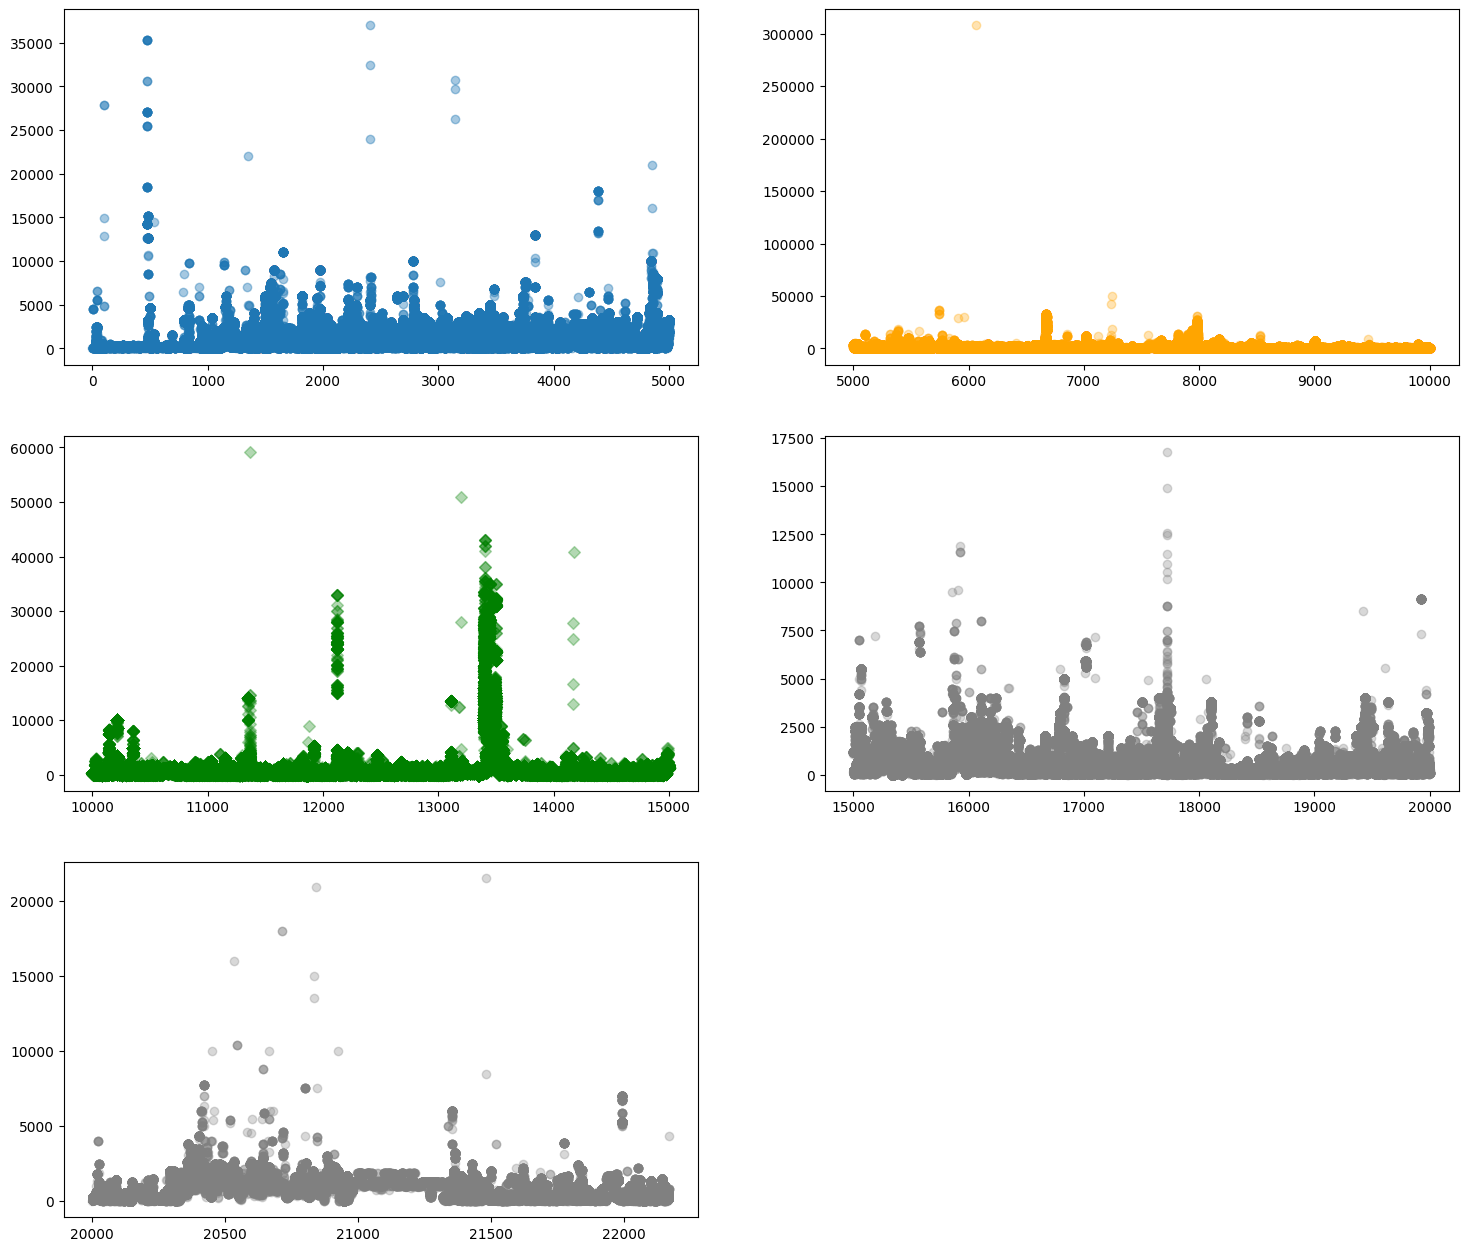

In [ ]:
plt.figure(figsize=(18, 16), dpi=100)
plt.subplot(321)
plt.scatter('item_id', 'item_price',
            data=df_train[df_train['item_id'] <= 5000],
            marker='o', alpha=0.4)

plt.subplot(322)
plt.scatter('item_id', 'item_price', 
            data=df_train[(df_train['item_id'] > 5000) & (df_train['item_id'] <= 10000)],
            marker='o', color="orange", alpha=0.3)

plt.subplot(323)
plt.scatter('item_id', 'item_price', 
            data=df_train[(df_train['item_id'] > 10000) & (df_train['item_id'] <= 15000)],
            marker='D', color="green", alpha=0.3)

plt.subplot(324)
plt.scatter('item_id', 'item_price',
            data=df_train[(df_train['item_id'] > 15000) & (df_train['item_id'] <= 20000)],
            marker='o', color="grey", alpha=0.3)

plt.subplot(325)
plt.scatter('item_id', 'item_price',
            data=df_train[df_train['item_id'] > 20000],
            marker='o', color="grey", alpha=0.3)
plt.show()

Found one outlier with price 307980 and item_id 6066

In [ ]:
df_train[df_train.item_price > 100000]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
1163158,11,12,6066,307980.0,1.0,2013,12


Unfortunately this item has no more prices in the dataset, so we will drop him

In [ ]:
df_train[df_train.item_id == 6066]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
1163158,11,12,6066,307980.0,1.0,2013,12


In [ ]:
df_train.drop(1163158, inplace=True)
df_train[df_train.item_price > 100000]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month


Found one negative price value

In [ ]:
df_train[df_train.item_price < 0]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
484683,4,32,2973,-1.0,1.0,2013,5


We can see that this item had other prices so we'll fill it instead of dropping

In [ ]:
df_train[df_train.item_id == 2973]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
352,0,25,2973,2499.00,13.0,2013,1
353,0,25,2973,2499.00,5.0,2013,1
354,0,25,2973,2499.00,3.0,2013,1
355,0,25,2973,2499.00,2.0,2013,1
356,0,25,2973,2499.00,3.0,2013,1
...,...,...,...,...,...,...,...
1765321,17,57,2973,1249.50,1.0,2014,6
1782298,17,47,2973,1249.00,1.0,2014,6
1851765,18,26,2973,1249.50,1.0,2014,7
1923837,19,6,2973,1249.50,1.0,2014,8


In [ ]:
df_train[(df_train.item_id == 2973) & (df_train.date_block_num == 4) &
         (df_train.shop_id == 32)]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
484682,4,32,2973,1249.0,1.0,2013,5
484683,4,32,2973,-1.0,1.0,2013,5
484684,4,32,2973,2499.0,1.0,2013,5


In [ ]:
df_train.loc[484683, 'item_price'] = 2499
df_train[df_train.item_price < 0]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month


In [ ]:
print('Last date block num - ', df_train.date_block_num.max())
print('Years: ', df_train.year.unique())

Last date block num -  33
Years:  [2013 2014 2015]


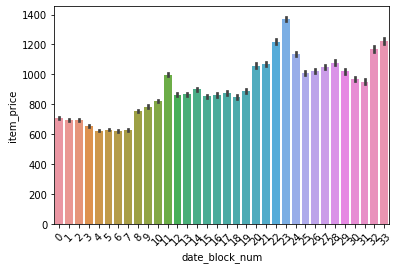

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x="date_block_num", y="item_price", data=df_train)
plt.xticks(rotation=45)
plt.show()

[]

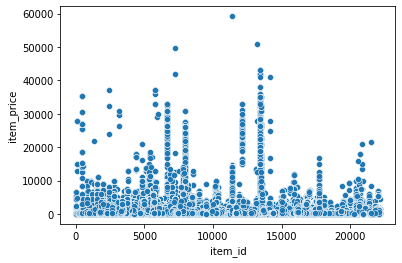

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='item_id', y='item_price', data=df_train)
plt.plot()

## Main

In [ ]:
from itertools import product
index_cols = ['shop_id','item_id','month','year','date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in df_train['date_block_num'].unique():
    cur_shops = df_train[df_train['date_block_num'] == block_num]['shop_id'].unique()
    cur_items = df_train[df_train['date_block_num'] == block_num]['item_id'].unique()
    cur_years = df_train[df_train['date_block_num'] == block_num]['year'].unique()
    cur_months = df_train[df_train['date_block_num'] == block_num]['month'].unique()
    grid.append(np.array(list(product(*[cur_shops,cur_items,cur_months,cur_years,[block_num]])),
                         dtype='int32'))

# Turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns=index_cols, dtype=np.int32)

In [ ]:
# Get aggregated values for (shop_id, item_id, month, year)
gb = df_train.groupby(index_cols, as_index=False)['item_cnt_day'].agg('sum')
# Fix column names
# gb.columns = [col[0] if col[-1] == '' else col[-1] for col in gb.columns.values]
print(gb)

         shop_id  item_id  month  year  date_block_num  item_cnt_day
0              0       30      2  2013               1          31.0
1              0       31      2  2013               1          11.0
2              0       32      1  2013               0           6.0
3              0       32      2  2013               1          10.0
4              0       33      1  2013               0           3.0
...          ...      ...    ...   ...             ...           ...
1609118       59    22164      4  2015              27           2.0
1609119       59    22164      7  2015              30           1.0
1609120       59    22167      6  2014              17           1.0
1609121       59    22167     10  2013               9           1.0
1609122       59    22167     12  2013              11           2.0

[1609123 rows x 6 columns]


In [ ]:
# Join aggregated data to the grid
df = pd.merge(grid, gb, how='left', on=index_cols).fillna(0)
# Sort the data
df.sort_values(['year','date_block_num','shop_id','item_id'], inplace=True)

In [ ]:
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt_day
139255,0,19,1,2013,0,0.0
141495,0,27,1,2013,0,0.0
144968,0,28,1,2013,0,0.0
142661,0,29,1,2013,0,0.0
138947,0,32,1,2013,0,6.0


In [ ]:
df.shape

(10913804, 6)

Add prices

In [ ]:
cols = ['date_block_num', 'item_id', 'shop_id', 'item_price']
prices = df_train.loc[:, cols].groupby(cols[:-1]).agg({'item_price': ['median']})\
                            .reset_index(2).reset_index(1).reset_index(0)
print(prices.head())

  date_block_num item_id shop_id item_price
                                     median
0              0      19      25       28.0
1              0      27       1     1890.0
2              0      27       2     2499.0
3              0      27      10     1890.0
4              0      27      19     2499.0


In [ ]:
df = pd.merge(df, prices, how='left', on=cols[:-1]).fillna(0)
item_price = df.iloc[:, 6]
df = df.iloc[:, :6]
df['item_price'] = item_price
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,shop_id,item_id,month,year,date_block_num,item_cnt_day,item_price
0,0,19,1,2013,0,0.0,0.0
1,0,27,1,2013,0,0.0,0.0
2,0,28,1,2013,0,0.0,0.0
3,0,29,1,2013,0,0.0,0.0
4,0,32,1,2013,0,6.0,221.0


For clarification now we have values in months, so we will rename **item_cnt_day** to **item_cnt**

In [ ]:
df = df.rename(columns={'item_cnt_day': 'item_cnt'})

In [ ]:
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price
0,0,19,1,2013,0,0.0,0.0
1,0,27,1,2013,0,0.0,0.0
2,0,28,1,2013,0,0.0,0.0
3,0,29,1,2013,0,0.0,0.0
4,0,32,1,2013,0,6.0,221.0


It makes sense to create new feature, that will contain item_cnt in previous month for every item and shop ids 

In [ ]:
cols = ['shop_id', 'item_id', 'date_block_num', 'item_cnt']

prev_val_benchmark = df.loc[:, cols]
prev_val_benchmark.date_block_num += 1
prev_val_benchmark.rename(columns={'item_cnt': 'prev_value'}, inplace=True)
prev_val_benchmark.head()

,shop_id,item_id,date_block_num,prev_value
0,0,19,1,0.0
1,0,27,1,0.0
2,0,28,1,0.0
3,0,29,1,0.0
4,0,32,1,6.0


In [ ]:
df = pd.merge(df, prev_val_benchmark,
              how='left', on=cols[:-1])
df.tail()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value
10913799,59,22162,10,2015,33,0.0,0.0,0.0
10913800,59,22163,10,2015,33,0.0,0.0,0.0
10913801,59,22164,10,2015,33,0.0,0.0,0.0
10913802,59,22166,10,2015,33,0.0,0.0,0.0
10913803,59,22167,10,2015,33,0.0,0.0,0.0


Non-existent values we fill with 0

In [ ]:
df['prev_value'] = df.prev_value.fillna(0)
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value
0,0,19,1,2013,0,0.0,0.0,0.0
1,0,27,1,2013,0,0.0,0.0,0.0
2,0,28,1,2013,0,0.0,0.0,0.0
3,0,29,1,2013,0,0.0,0.0,0.0
4,0,32,1,2013,0,6.0,221.0,0.0


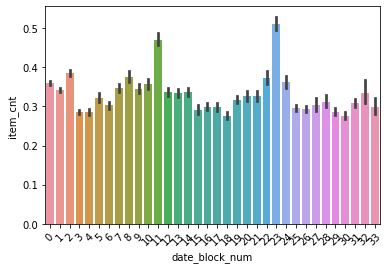

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ax = sns.barplot(x="date_block_num", y="item_cnt", data=df)
# plt.xticks(rotation=45)
# plt.show()

Moreover it makes sense to create new feature, that will display **item_cnt** in previous year in the same month

In [ ]:
cols = ['shop_id', 'item_id', 'date_block_num', 'item_cnt']

prev_val_year_benchmark = df.loc[:, cols]
prev_val_year_benchmark.date_block_num += 12
prev_val_year_benchmark.rename(columns={'item_cnt': 'prev_value_year'}, inplace=True)
prev_val_year_benchmark.head()

,shop_id,item_id,date_block_num,prev_value_year
0,0,19,12,0.0
1,0,27,12,0.0
2,0,28,12,0.0
3,0,29,12,0.0
4,0,32,12,6.0


In [ ]:
df = pd.merge(df, prev_val_year_benchmark,
              how='left', on=cols[:-1])
df.tail()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year
10913799,59,22162,10,2015,33,0.0,0.0,0.0,NaN
10913800,59,22163,10,2015,33,0.0,0.0,0.0,NaN
10913801,59,22164,10,2015,33,0.0,0.0,0.0,NaN
10913802,59,22166,10,2015,33,0.0,0.0,0.0,0.0
10913803,59,22167,10,2015,33,0.0,0.0,0.0,0.0


Non-existent we fill with 0

In [ ]:
df['prev_value_year'] = df.prev_value_year.fillna(0)
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year
0,0,19,1,2013,0,0.0,0.0,0.0,0.0
1,0,27,1,2013,0,0.0,0.0,0.0,0.0
2,0,28,1,2013,0,0.0,0.0,0.0,0.0
3,0,29,1,2013,0,0.0,0.0,0.0,0.0
4,0,32,1,2013,0,6.0,221.0,0.0,0.0


New features:
*   stock_prev = item_price * prev_value
*   stock_prev_year = item_price * prev_value_year




In [ ]:
df['stock_prev'] = df['item_price'] * df['prev_value']
df['stock_prev_year'] = df['item_price'] * df['prev_value_year']

In [ ]:
df.loc[df['stock_prev'] < 0, 'stock_prev'] = 0
df.loc[df['stock_prev_year'] < 0, 'stock_prev_year'] = 0
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year
0,0,19,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,27,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,28,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,29,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,32,1,2013,0,6.0,221.0,0.0,0.0,0.0,0.0


Merge with df_shops for additional info

In [ ]:
df = pd.merge(df, df_shops,
              how='left', on='shop_id')
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,city_enc,shop_type_enc
0,0,19,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4
1,0,27,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4
2,0,28,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4
3,0,29,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4
4,0,32,1,2013,0,6.0,221.0,0.0,0.0,0.0,0.0,29,4


Merge with df_cat for additional info

In [ ]:
df = pd.merge(df, df_cat,
              how='left', on='item_id')
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,city_enc,shop_type_enc,item_category_id,digital,item_area_enc,area_to_enc
0,0,19,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,40,0,7,4
1,0,27,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,19,0,5,9
2,0,28,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,30,0,5,49
3,0,29,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,23,0,5,18
4,0,32,1,2013,0,6.0,221.0,0.0,0.0,0.0,0.0,29,4,40,0,7,4


Rename for clarification

In [ ]:
df = df.rename(columns={'city_enc': 'shop_city',
                        'shop_type_enc': 'shop_category',
                        'item_area_enc': 'category_type',
                        'area_to_enc': 'category_subtype'})
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype
0,0,19,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,40,0,7,4
1,0,27,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,19,0,5,9
2,0,28,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,30,0,5,49
3,0,29,1,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,29,4,23,0,5,18
4,0,32,1,2013,0,6.0,221.0,0.0,0.0,0.0,0.0,29,4,40,0,7,4


Set columns types to control the df size (advice from Kaggle)

In [ ]:
df['shop_id'] = df['shop_id'].astype(np.int8)
df['item_id'] = df['item_id'].astype(np.int16)
df['month'] = df['month'].astype(np.int8)
df['year'] = df['year'].astype(np.int16)
df['date_block_num'] = df['date_block_num'].astype(np.int8)
df['item_cnt'] = df['item_cnt'].astype(np.int32)
df['prev_value'] = df['prev_value'].astype(np.int32)
df['prev_value_year'] = df['prev_value_year'].astype(np.int32)
df['shop_city'] = df['shop_city'].astype(np.int8)
df['shop_category'] = df['shop_category'].astype(np.int8)
df['item_category_id'] = df['item_category_id'].astype(np.int8)
df['digital'] = df['digital'].astype(np.bool_)
df['category_type'] = df['category_type'].astype(np.int8)
df['category_subtype'] = df['category_subtype'].astype(np.int8)

In [ ]:
print('{0:.2f}'.format(df.memory_usage(index=False, deep=True).sum()/(2**20)), 'MB')

510.00 MB


Lagged features (advice from Kaggle)


---

It works as we will have different *lags* for target value groupped by **shop_id**, **item_id** and **category**

In [ ]:
def lag_feature(df, lags, col):
    print(col)
    for i in lags:
        shifted = df[["date_block_num","shop_id","item_id",col]].copy()
        shifted.columns = ["date_block_num","shop_id","item_id", col+"_lag_"+str(i)]
        shifted.date_block_num += i
        df = df.merge(shifted, on=['date_block_num','shop_id','item_id'], how='left').fillna(0)
    return df

In [ ]:
df = lag_feature(df, [2, 3, 4, 5, 6], 'item_cnt')

item_cnt


In [ ]:
df['item_cnt_lag_2'] = df['item_cnt_lag_2'].astype(np.int32)
df['item_cnt_lag_3'] = df['item_cnt_lag_3'].astype(np.int32)
df['item_cnt_lag_4'] = df['item_cnt_lag_4'].astype(np.int32)
df['item_cnt_lag_5'] = df['item_cnt_lag_5'].astype(np.int32)
df['item_cnt_lag_6'] = df['item_cnt_lag_6'].astype(np.int32)

In [ ]:
gb = df.groupby(['shop_id', 'date_block_num'], as_index=False)\
        .agg({'item_cnt':'sum'})\
        .rename(columns={'item_cnt':'cnt_block_shop'}, inplace=False)
df = df.merge(gb, how='left', on=['shop_id', 'date_block_num']).fillna(0)
df = lag_feature(df, [1, 2, 3, 4, 5, 12], 'cnt_block_shop')
df.drop('cnt_block_shop', axis=1, inplace=True)

gb = df.groupby(['item_id', 'date_block_num'], as_index=False)\
        .agg({'item_cnt':'sum'})\
        .rename(columns={'item_cnt':'cnt_block_item'}, inplace=False)
df = df.merge(gb, how='left', on=['item_id', 'date_block_num']).fillna(0)
df = lag_feature(df, [1, 2, 3, 4, 5, 12], 'cnt_block_item')
df.drop('cnt_block_item', axis=1, inplace=True)

gb = df.groupby(['category_type', 'date_block_num'], as_index=False)\
        .agg({'item_cnt':'sum'})\
        .rename(columns={'item_cnt':'cnt_block_category'}, inplace=False)
df = df.merge(gb, how='left', on=['category_type', 'date_block_num']).fillna(0)
df = lag_feature(df, [1, 2, 3, 4, 5, 12], 'cnt_block_category')
df.drop('cnt_block_category', axis=1, inplace=True)

df.head()

cnt_block_shop
cnt_block_item
cnt_block_category


,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,cnt_block_shop_lag_1,cnt_block_shop_lag_2,cnt_block_shop_lag_3,cnt_block_shop_lag_4,cnt_block_shop_lag_5,cnt_block_shop_lag_12,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_item_lag_12,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,cnt_block_category_lag_12
0,0,19,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,40,False,7,4,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,27,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,19,False,5,9,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,28,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,30,False,5,49,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,29,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,23,False,5,18,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,32,1,2013,0,6,221.0,0,0,0.0,0.0,29,4,40,False,7,4,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,cnt_block_shop_lag_1,cnt_block_shop_lag_2,cnt_block_shop_lag_3,cnt_block_shop_lag_4,cnt_block_shop_lag_5,cnt_block_shop_lag_12,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_item_lag_12,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,cnt_block_category_lag_12
10913799,59,22162,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,40,False,7,4,1,0,0,1,1,914.0,1214.0,992.0,913.0,916.0,0.0,7.0,14.0,27.0,22.0,35.0,0.0,11228.0,13097.0,13776.0,14155.0,13940.0,0.0
10913800,59,22163,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,40,False,7,4,0,0,0,0,0,914.0,1214.0,0.0,0.0,0.0,0.0,20.0,29.0,0.0,0.0,0.0,0.0,11228.0,13097.0,0.0,0.0,0.0,0.0
10913801,59,22164,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,37,False,7,14,0,1,0,0,2,914.0,1214.0,992.0,913.0,916.0,0.0,9.0,20.0,12.0,6.0,23.0,0.0,11228.0,13097.0,13776.0,14155.0,13940.0,0.0
10913802,59,22166,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,54,True,8,0,0,0,0,0,0,914.0,1214.0,992.0,913.0,916.0,1211.0,5.0,11.0,8.0,10.0,8.0,12.0,3123.0,2732.0,2428.0,2097.0,1993.0,1920.0
10913803,59,22167,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,49,False,8,36,0,0,0,0,0,914.0,1214.0,992.0,913.0,916.0,1211.0,21.0,29.0,34.0,33.0,31.0,49.0,3123.0,2732.0,2428.0,2097.0,1993.0,1920.0


Mean encoding:


*   For every month
*   For every shop
*   For every category



In [ ]:
group = df.groupby(['date_block_num', 'item_id']).agg({'item_cnt': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

df = pd.merge(df, group, on=['date_block_num','item_id'], how='left')
df['date_item_avg_item_cnt'] = df['date_item_avg_item_cnt'].astype(np.float16)

In [ ]:
group = df.groupby(['shop_id', 'item_id']).agg({'item_cnt': ['mean']})
group.columns = [ 'shop_item_avg_item_cnt' ]
group.reset_index(inplace=True)

df = pd.merge(df, group, on=['shop_id','item_id'], how='left')
df['shop_item_avg_item_cnt'] = df['shop_item_avg_item_cnt'].astype(np.float16)

In [ ]:
group = df.groupby(['item_category_id', 'item_id']).agg({'item_cnt': ['mean']})
group.columns = [ 'cat_item_avg_item_cnt' ]
group.reset_index(inplace=True)

df = pd.merge(df, group, on=['item_category_id','item_id'], how='left')
df['cat_item_avg_item_cnt'] = df['cat_item_avg_item_cnt'].astype(np.float16)

In [ ]:
df.head()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,cnt_block_shop_lag_1,cnt_block_shop_lag_2,cnt_block_shop_lag_3,cnt_block_shop_lag_4,cnt_block_shop_lag_5,cnt_block_shop_lag_12,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_item_lag_12,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,cnt_block_category_lag_12,date_item_avg_item_cnt,shop_item_avg_item_cnt,cat_item_avg_item_cnt
0,0,19,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,40,False,7,4,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022217,0.0,0.022217
1,0,27,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,19,False,5,9,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155518,0.0,0.056824
2,0,28,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,30,False,5,49,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177734,0.0,0.141235
3,0,29,1,2013,0,0,0.0,0,0,0.0,0.0,29,4,23,False,5,18,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088867,0.0,0.037384
4,0,32,1,2013,0,6,221.0,0,0,0.0,0.0,29,4,40,False,7,4,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.644531,8.0,1.319336


Some Kaggle Advice again (some magic with prices)

**Delta_price_lag**

In [ ]:
group = df.groupby(["item_id"]).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace = True)

df = df.merge(group, on = ["item_id"], how="left")
df["item_avg_item_price"] = df.item_avg_item_price.astype(np.float16)

In [ ]:
group = df.groupby(["date_block_num","item_id"]).agg({"item_price": ["mean"]})
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace=True)

df = df.merge(group, on=["date_block_num","item_id"], how="left")
df["date_item_avg_item_price"] = df.date_item_avg_item_price.astype(np.float16)

In [ ]:
lags = [1, 2, 3]
df = lag_feature(df, lags, "date_item_avg_item_price")
for i in lags:
    df["delta_price_lag_"+str(i)] = (df["date_item_avg_item_price_lag_"+str(i)]-df["item_avg_item_price"]) / df["item_avg_item_price"]

date_item_avg_item_price


In [ ]:
def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0

df["delta_price_lag"] = df.apply(select_trends, axis=1)
df["delta_price_lag"] = df.delta_price_lag.astype(np.float16)
df["delta_price_lag"].fillna(0, inplace=True)

features_to_drop = ["item_avg_item_price","date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_"+str(i))
    features_to_drop.append("delta_price_lag_"+str(i))
df.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913804 entries, 0 to 10913803
Data columns (total 44 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   shop_id                    int8   
 1   item_id                    int16  
 2   month                      int8   
 3   year                       int16  
 4   date_block_num             int8   
 5   item_cnt                   int32  
 6   item_price                 float64
 7   prev_value                 int32  
 8   prev_value_year            int32  
 9   stock_prev                 float64
 10  stock_prev_year            float64
 11  shop_city                  int8   
 12  shop_category              int8   
 13  item_category_id           int8   
 14  digital                    bool   
 15  category_type              int8   
 16  category_subtype           int8   
 17  item_cnt_lag_2             int32  
 18  item_cnt_lag_3             int32  
 19  item_cnt_lag_4             int32  
 20  

In [ ]:
for col in df.columns[22:40]:
    print(col)

cnt_block_shop_lag_1
cnt_block_shop_lag_2
cnt_block_shop_lag_3
cnt_block_shop_lag_4
cnt_block_shop_lag_5
cnt_block_shop_lag_12
cnt_block_item_lag_1
cnt_block_item_lag_2
cnt_block_item_lag_3
cnt_block_item_lag_4
cnt_block_item_lag_5
cnt_block_item_lag_12
cnt_block_category_lag_1
cnt_block_category_lag_2
cnt_block_category_lag_3
cnt_block_category_lag_4
cnt_block_category_lag_5
cnt_block_category_lag_12


Check if there are any floats (there are no)

In [ ]:
# for col in df.columns[22:40]:
#     vals = df.loc[:, col].values
#     for val in vals:
#         if val.is_integer():
#             pass
#         else:
#             print(val)

In [ ]:
for col in df.columns[22:40]:
    df[col] = df[col].astype(np.int32)

In [ ]:
print('{0:.2f}'.format(df.memory_usage(index=False, deep=True).sum()/(2**20)), 'MB')

1550.82 MB


In [ ]:
df.tail()

,shop_id,item_id,month,year,date_block_num,item_cnt,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,cnt_block_shop_lag_1,cnt_block_shop_lag_2,cnt_block_shop_lag_3,cnt_block_shop_lag_4,cnt_block_shop_lag_5,cnt_block_shop_lag_12,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_item_lag_12,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,cnt_block_category_lag_12,date_item_avg_item_cnt,shop_item_avg_item_cnt,cat_item_avg_item_cnt,delta_price_lag,item_avg_item_price,date_item_avg_item_price
10913799,59,22162,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,40,False,7,4,1,0,0,1,1,914,1214,992,913,916,0,7,14,27,22,35,0,11228,13097,13776,14155,13940,0,0.227295,1.599609,1.556641,-0.649414,138.875000,71.375000
10913800,59,22163,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,40,False,7,4,0,0,0,0,0,914,1214,0,0,0,0,20,29,0,0,0,0,11228,13097,0,0,0,0,0.590820,0.000000,0.581543,-0.202759,49.312500,59.656250
10913801,59,22164,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,37,False,7,14,0,1,0,0,2,914,1214,992,913,916,0,9,20,12,6,23,0,11228,13097,13776,14155,13940,0,0.340820,0.666504,1.235352,-0.583496,276.250000,124.750000
10913802,59,22166,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,54,True,8,0,0,0,0,0,0,914,1214,992,913,916,1211,5,11,8,10,8,12,3123,2732,2428,2097,1993,1920,0.250000,0.000000,0.295898,0.093689,3.189453,3.408203
10913803,59,22167,10,2015,33,0,0.0,0,0,0.0,0.0,30,4,49,False,8,36,0,0,0,0,0,914,1214,992,913,916,1211,21,29,34,33,31,49,3123,2732,2428,2097,1993,1920,0.840820,0.153809,1.081055,-0.616211,108.750000,85.062500


In [ ]:
dest = '/content/drive/MyDrive/HSE Final Project/to_train'
df.to_csv(dest + '/submit_10_abandoned.csv', index=False)

# Test Submission to kaggle

In [ ]:
test_dest = '/content/drive/MyDrive/HSE Final Project/Data/test.csv'
test_df = pd.read_csv(test_dest)
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


Same actions for test as for train

In [ ]:
prices = df_train.groupby(['shop_id', 'item_id']).agg({'item_price': ['max']})\
                            .reset_index(1).reset_index(0)
prices.head()

,shop_id,item_id,item_price
,,,max
0,0,30,265.0
1,0,31,434.0
2,0,32,221.0
3,0,33,347.0
4,0,35,247.0


In [ ]:
cols = ['shop_id', 'item_id', 'date_block_num', 'item_cnt']
test_features = test_df.drop('ID', axis=1)
test_features['month'] = 11
test_features['year'] = 2015
test_features['date_block_num'] = 34

test_features = pd.merge(test_features, prices,
                         how='left', on=cols[:-2]).fillna(0)
item_price = test_features.iloc[:, -1]
test_features = test_features.iloc[:, :-1]
test_features['item_price'] = item_price

test_features = pd.merge(test_features, prev_val_benchmark,
                         how='left', on=cols[:-1]).fillna(0)
test_features = pd.merge(test_features, prev_val_year_benchmark,
                         how='left', on=cols[:-1]).fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
test_features['stock_prev'] = test_features['item_price'] * test_features['prev_value']
test_features['stock_prev_year'] = test_features['item_price'] * test_features['prev_value_year']
test_features.loc[test_features['stock_prev'] < 0, 'stock_prev'] = 0
test_features.loc[test_features['stock_prev_year'] < 0, 'stock_prev_year'] = 0
test_features = pd.merge(test_features, df_shops,
                         how='left', on='shop_id')
test_features = pd.merge(test_features, df_cat,
                         how='left', on='item_id')
print(test_features.head())

   shop_id  item_id  month  ...  digital  item_area_enc  area_to_enc
0        5     5037     11  ...        0              5            9
1        5     5320     11  ...        0              9            2
2        5     5233     11  ...        0              5            9
3        5     5232     11  ...        0              5           18
4        5     5268     11  ...        0              5           10

[5 rows x 16 columns]


In [ ]:
test_features.columns

Index(['shop_id', 'item_id', 'month', 'year', 'date_block_num', 'item_price',
       'prev_value', 'prev_value_year', 'stock_prev', 'stock_prev_year',
       'city_enc', 'shop_type_enc', 'item_category_id', 'digital',
       'item_area_enc', 'area_to_enc'],
      dtype='object')

In [ ]:
test_features = test_features.rename(columns={'city_enc': 'shop_city',
                                'shop_type_enc': 'shop_category',
                                'item_area_enc': 'category_type',
                                'area_to_enc': 'category_subtype'})

test_features['shop_id'] = test_features['shop_id'].astype(np.int8)
test_features['item_id'] = test_features['item_id'].astype(np.int16)
test_features['month'] = test_features['month'].astype(np.int8)
test_features['year'] = test_features['year'].astype(np.int16)
test_features['date_block_num'] = test_features['date_block_num'].astype(np.int8)
test_features['prev_value'] = test_features['prev_value'].astype(np.int32)
test_features['prev_value_year'] = test_features['prev_value_year'].astype(np.int32)
test_features['shop_city'] = test_features['shop_city'].astype(np.int8)
test_features['shop_category'] = test_features['shop_category'].astype(np.int8)
test_features['item_category_id'] = test_features['item_category_id'].astype(np.int8)
test_features['digital'] = test_features['digital'].astype(np.bool_)
test_features['category_type'] = test_features['category_type'].astype(np.int8)
test_features['category_subtype'] = test_features['category_subtype'].astype(np.int8)

In [ ]:
lags = [2, 3, 4, 5, 6]
col = 'item_cnt'

for i in lags:
    shifted = df[["date_block_num","shop_id","item_id",col]].copy()
    shifted.columns = ["date_block_num","shop_id","item_id", col+"_lag_"+str(i)]
    shifted.date_block_num += i
    test_features = test_features.merge(shifted, on=['date_block_num','shop_id','item_id'], how='left').fillna(0)

In [ ]:
lags = [1, 2, 3, 4, 5, 12]
cols = [['shop_id', 'cnt_block_shop'],
        ['item_id', 'cnt_block_item'],
        ['category_type', 'cnt_block_category']]

for col in cols:
    gb = df.groupby([col[0], 'date_block_num'], as_index=False)\
        .agg({'item_cnt':'sum'})\
        .rename(columns={'item_cnt':col[1]}, inplace=False)
    df = df.merge(gb, how='left', on=[col[0], 'date_block_num']).fillna(0)
    for i in lags:
        shifted = df[["date_block_num","shop_id","item_id",col[1]]].copy()
        shifted.columns = ["date_block_num","shop_id","item_id", col[1]+"_lag_"+str(i)]
        shifted.date_block_num += i
        test_features = test_features.merge(shifted, on=['date_block_num','shop_id','item_id'], how='left').fillna(0)
    df.drop(col[1], axis=1, inplace=True)

In [ ]:
test_features.head()

,shop_id,item_id,month,year,date_block_num,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,cnt_block_shop_lag_1,cnt_block_shop_lag_2,cnt_block_shop_lag_3,cnt_block_shop_lag_4,cnt_block_shop_lag_5,cnt_block_shop_lag_12,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_item_lag_12,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,cnt_block_category_lag_12
0,5,5037,11,2015,34,2599.0,0,1,0.0,2599.0,3,3,19,False,5,9,1.0,3.0,1.0,1.0,1.0,1052.0,1092.0,1294.0,991.0,954.0,1445.0,25.0,110.0,119.0,54.0,105.0,65.0,21346.0,24604.0,23616.0,19872.0,22261.0,49726.0
1,5,5320,11,2015,34,0.0,0,0,0.0,0.0,3,3,55,False,9,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,11,2015,34,1199.0,1,0,1199.0,0.0,3,3,19,False,5,9,3.0,1.0,0.0,2.0,3.0,1052.0,1092.0,1294.0,991.0,954.0,0.0,42.0,80.0,150.0,37.0,119.0,0.0,21346.0,24604.0,23616.0,19872.0,22261.0,0.0
3,5,5232,11,2015,34,599.0,0,0,0.0,0.0,3,3,23,False,5,18,0.0,1.0,0.0,0.0,0.0,1052.0,1092.0,1294.0,0.0,0.0,0.0,28.0,48.0,65.0,0.0,0.0,0.0,21346.0,24604.0,23616.0,0.0,0.0,0.0
4,5,5268,11,2015,34,0.0,0,0,0.0,0.0,3,3,20,False,5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mean encoding for test

In [ ]:
group = df.groupby(['date_block_num', 'item_id']).agg({'item_cnt': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

test_features = pd.merge(test_features, group, on=['date_block_num','item_id'], how='left').fillna(0)
test_features['date_item_avg_item_cnt'] = test_features['date_item_avg_item_cnt'].astype(np.float16)

In [ ]:
group = df.groupby(['shop_id', 'item_id']).agg({'item_cnt': ['mean']})
group.columns = [ 'shop_item_avg_item_cnt' ]
group.reset_index(inplace=True)

test_features = pd.merge(test_features, group, on=['shop_id','item_id'], how='left').fillna(0)
test_features['shop_item_avg_item_cnt'] = test_features['shop_item_avg_item_cnt'].astype(np.float16)

In [ ]:
group = df.groupby(['item_category_id', 'item_id']).agg({'item_cnt': ['mean']})
group.columns = [ 'cat_item_avg_item_cnt' ]
group.reset_index(inplace=True)

test_features = pd.merge(test_features, group, on=['item_category_id','item_id'], how='left').fillna(0)
test_features['cat_item_avg_item_cnt'] = test_features['cat_item_avg_item_cnt'].astype(np.float16)

In [ ]:
test_features.head()

,shop_id,item_id,month,year,date_block_num,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,cnt_block_shop_lag_1,cnt_block_shop_lag_2,cnt_block_shop_lag_3,cnt_block_shop_lag_4,cnt_block_shop_lag_5,cnt_block_shop_lag_12,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_item_lag_12,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,cnt_block_category_lag_12,date_item_avg_item_cnt,shop_item_avg_item_cnt,cat_item_avg_item_cnt
0,5,5037,11,2015,34,2599.0,0,1,0.0,2599.0,3,3,19,False,5,9,1.0,3.0,1.0,1.0,1.0,1052.0,1092.0,1294.0,991.0,954.0,1445.0,25.0,110.0,119.0,54.0,105.0,65.0,21346.0,24604.0,23616.0,19872.0,22261.0,49726.0,0.0,0.928711,1.951172
1,5,5320,11,2015,34,0.0,0,0,0.0,0.0,3,3,55,False,9,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,5,5233,11,2015,34,1199.0,1,0,1199.0,0.0,3,3,19,False,5,9,3.0,1.0,0.0,2.0,3.0,1052.0,1092.0,1294.0,991.0,954.0,0.0,42.0,80.0,150.0,37.0,119.0,0.0,21346.0,24604.0,23616.0,19872.0,22261.0,0.0,0.0,1.428711,1.657227
3,5,5232,11,2015,34,599.0,0,0,0.0,0.0,3,3,23,False,5,18,0.0,1.0,0.0,0.0,0.0,1052.0,1092.0,1294.0,0.0,0.0,0.0,28.0,48.0,65.0,0.0,0.0,0.0,21346.0,24604.0,23616.0,0.0,0.0,0.0,0.0,0.333252,1.092773
4,5,5268,11,2015,34,0.0,0,0,0.0,0.0,3,3,20,False,5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
group = df.groupby(["item_id"]).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace=True)

test_features = test_features.merge(group, on=["item_id"], how="left")
test_features["item_avg_item_price"] = test_features.item_avg_item_price.astype(np.float16)

In [ ]:
group = test_features.groupby(["date_block_num","item_id"]).agg({"item_price": ["mean"]})
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace=True)

test_features = test_features.merge(group, on=["date_block_num","item_id"], how="left")
test_features["date_item_avg_item_price"] = test_features.date_item_avg_item_price.astype(np.float16)

In [ ]:
lags = [1, 2, 3]
col = "date_item_avg_item_price"

for i in lags:
    shifted = df[["date_block_num","shop_id","item_id",col]].copy()
    shifted.columns = ["date_block_num","shop_id","item_id", col+"_lag_"+str(i)]
    shifted.date_block_num += i
    test_features = test_features.merge(shifted, on=['date_block_num','shop_id','item_id'], how='left').fillna(0)

for i in lags:
    test_features["delta_price_lag_"+str(i)] = (test_features["date_item_avg_item_price_lag_"+str(i)]-test_features["item_avg_item_price"]) / df["item_avg_item_price"]

In [ ]:
def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0

test_features["delta_price_lag"] = test_features.apply(select_trends, axis=1)
test_features["delta_price_lag"] = test_features.delta_price_lag.astype(np.float16)
test_features["delta_price_lag"].fillna(0, inplace=True)

features_to_drop = ["item_avg_item_price","date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_"+str(i))
    features_to_drop.append("delta_price_lag_"+str(i))

test_features.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
test_features.columns[16:39]

Index(['item_cnt_lag_2', 'item_cnt_lag_3', 'item_cnt_lag_4', 'item_cnt_lag_5',
       'item_cnt_lag_6', 'cnt_block_shop_lag_1', 'cnt_block_shop_lag_2',
       'cnt_block_shop_lag_3', 'cnt_block_shop_lag_4', 'cnt_block_shop_lag_5',
       'cnt_block_shop_lag_12', 'cnt_block_item_lag_1', 'cnt_block_item_lag_2',
       'cnt_block_item_lag_3', 'cnt_block_item_lag_4', 'cnt_block_item_lag_5',
       'cnt_block_item_lag_12', 'cnt_block_category_lag_1',
       'cnt_block_category_lag_2', 'cnt_block_category_lag_3',
       'cnt_block_category_lag_4', 'cnt_block_category_lag_5',
       'cnt_block_category_lag_12'],
      dtype='object')

In [ ]:
for col in test_features.columns[16:39]:
    test_features[col] = test_features[col].astype(np.int32)

In [ ]:
print('{0:.2f}'.format(test_features.memory_usage(index=False, deep=True).sum()/(2**20)), 'MB')

29.62 MB


In [ ]:
test_features.head()

,shop_id,item_id,month,year,date_block_num,item_price,prev_value,prev_value_year,stock_prev,stock_prev_year,shop_city,shop_category,item_category_id,digital,category_type,category_subtype,item_cnt_lag_2,item_cnt_lag_3,item_cnt_lag_4,item_cnt_lag_5,item_cnt_lag_6,cnt_block_shop_lag_1,cnt_block_shop_lag_2,cnt_block_shop_lag_3,cnt_block_shop_lag_4,cnt_block_shop_lag_5,cnt_block_shop_lag_12,cnt_block_item_lag_1,cnt_block_item_lag_2,cnt_block_item_lag_3,cnt_block_item_lag_4,cnt_block_item_lag_5,cnt_block_item_lag_12,cnt_block_category_lag_1,cnt_block_category_lag_2,cnt_block_category_lag_3,cnt_block_category_lag_4,cnt_block_category_lag_5,cnt_block_category_lag_12,date_item_avg_item_cnt,shop_item_avg_item_cnt,cat_item_avg_item_cnt,delta_price_lag
0,5,5037,11,2015,34,2599.0,0,1,0.0,2599.0,3,3,19,False,5,9,1,3,1,1,1,1052,1092,1294,991,954,1445,25,110,119,54,105,65,21346,24604,23616,19872,22261,49726,0.0,0.928711,1.951172,-1188.000000
1,5,5320,11,2015,34,0.0,0,0,0.0,0.0,3,3,55,False,9,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000
2,5,5233,11,2015,34,1199.0,1,0,1199.0,0.0,3,3,19,False,5,9,3,1,0,2,3,1052,1092,1294,991,954,0,42,80,150,37,119,0,21346,24604,23616,19872,22261,0,0.0,1.428711,1.657227,6.097656
3,5,5232,11,2015,34,599.0,0,0,0.0,0.0,3,3,23,False,5,18,0,1,0,0,0,1052,1092,1294,0,0,0,28,48,65,0,0,0,21346,24604,23616,0,0,0,0.0,0.333252,1.092773,0.854492
4,5,5268,11,2015,34,0.0,0,0,0.0,0.0,3,3,20,False,5,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000


In [ ]:
dest = '/content/drive/MyDrive/HSE Final Project/to_test'
name = 'submit_10_test.csv'
test_features.to_csv(dest + '/' + name, index=False)